In [1]:
####================ Import Libraries ================
#Import required packages
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
import warnings
warnings.filterwarnings("ignore")



Using TensorFlow backend.


In [2]:
####=========== Import and read the dataset ===========

# reading dataset as pandas DataFrame
df_main = pd.read_csv('US_Accidents_June20.csv')
df_main = pd.DataFrame(df_main)

#shape of dataset
print(df_main.shape)

(3513617, 49)


In [3]:
# Getting DataFrame copy to avoid changes in original main file
df = df_main.copy()
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# reading all the columns/features names as list for our reference
print(df.columns)


Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


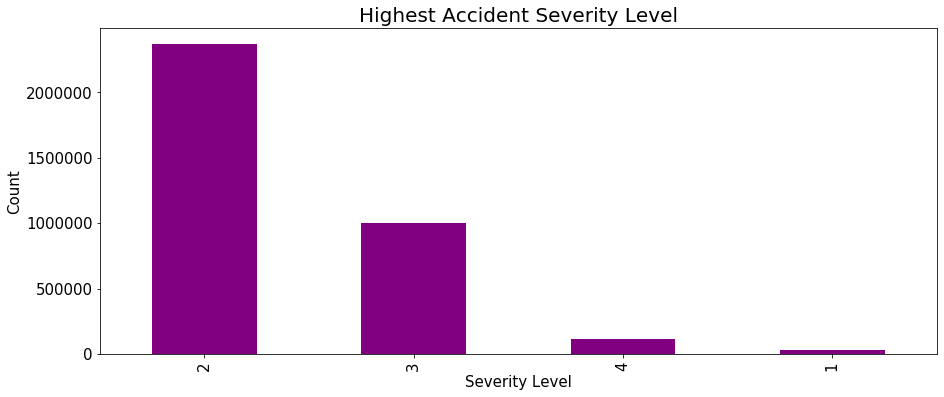

In [5]:
# Severity of Accidents happening the most 
plt.figure(figsize=(15,6))
state_accidents = df.Severity.value_counts().plot(kind='bar',color='purple')
state_accidents.set_xlabel('Severity Level', fontsize=15)
state_accidents.set_ylabel('Count', fontsize=15)
state_accidents.set_title('Highest Accident Severity Level', fontsize=20)
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 15) 
plt.show()

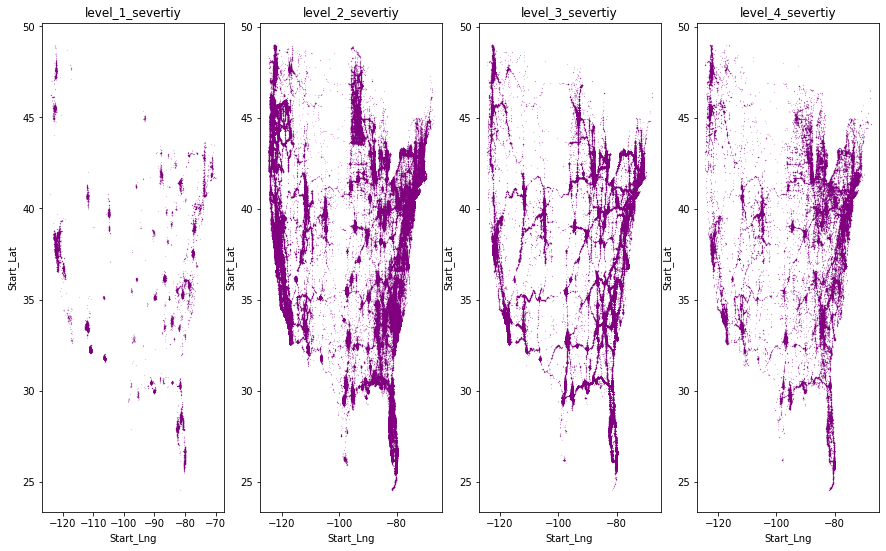

In [6]:
# severity of accidents shown using Lat Long
level1 = df[df['Severity'] == 1]
level2 = df[df['Severity'] == 2]
level3 = df[df['Severity'] == 3]
level4 = df[df['Severity'] == 4]

figure, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,9))

# level 1 plot

level1.plot(kind='scatter', x='Start_Lng',y ='Start_Lat',
                color='purple', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("level_1_severtiy")
ax1.set_facecolor('white')

## level 2 plot
level2.plot(kind='scatter', x='Start_Lng',y ='Start_Lat',
                color='purple', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("level_2_severtiy")
ax2.set_facecolor('white')


## level 3 plot
level3.plot(kind='scatter', x='Start_Lng',y ='Start_Lat',
                color='purple', 
                s=.02, alpha=.6, subplots=True, ax=ax3)
ax3.set_title("level_3_severtiy")
ax3.set_facecolor('white')


## level 4 plot
level4.plot(kind='scatter', x='Start_Lng',y ='Start_Lat',
                color='purple', 
                s=.02, alpha=.6, subplots=True, ax=ax4)
ax4.set_title("level_4_severtiy")
ax4.set_facecolor('white')

figure.show()

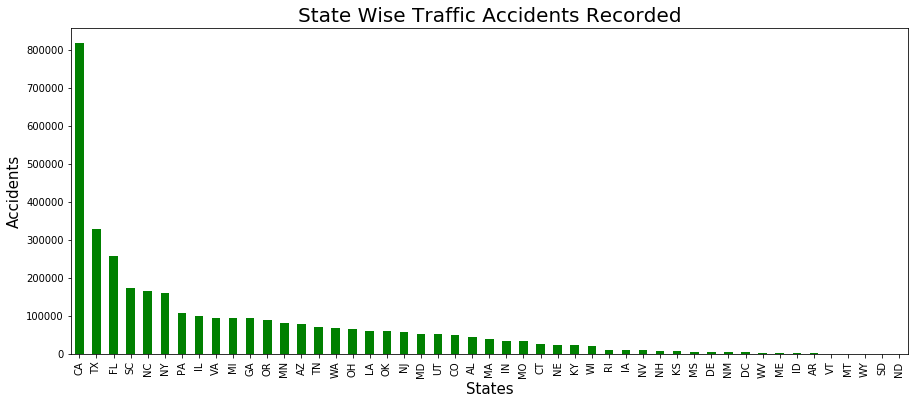

In [7]:
#State wise highest number of accidents to narrow down the scope of project
plt.figure(figsize=(15,6))
state_accidents = df.State.value_counts().plot(kind='bar',color='green')
state_accidents.set_xlabel('States', fontsize=15)
state_accidents.set_ylabel('Accidents', fontsize=15)
state_accidents.set_title('State Wise Traffic Accidents Recorded', fontsize=20)
plt.show()

In [8]:
# #### =================DATASET INFO & DESCRIPTION =================
print ('='*50 + '\n')
print("Features Description")
print ('='*50 + '\n')
print(df.describe())


#Missing values and dtype of all the features of dataset  
print ('='*50 + '\n')
print("Features with Missing value and dtypes", '\n')
print ('='*50 + '\n')
missingvalues_dtypes = pd.concat([df.isnull().sum(), df.dtypes], axis =1 )
print(missingvalues_dtypes)


Features Description

                TMC      Severity     Start_Lat     Start_Lng       End_Lat  \
count  2.478818e+06  3.513617e+06  3.513617e+06  3.513617e+06  1.034799e+06   
mean   2.080226e+02  2.339929e+00  3.654195e+01 -9.579151e+01  3.755758e+01   
std    2.076627e+01  5.521935e-01  4.883520e+00  1.736877e+01  4.861215e+00   
min    2.000000e+02  1.000000e+00  2.455527e+01 -1.246238e+02  2.457011e+01   
25%    2.010000e+02  2.000000e+00  3.363784e+01 -1.174418e+02  3.399477e+01   
50%    2.010000e+02  2.000000e+00  3.591687e+01 -9.102601e+01  3.779736e+01   
75%    2.010000e+02  3.000000e+00  4.032217e+01 -8.093299e+01  4.105139e+01   
max    4.060000e+02  4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01   

            End_Lng  Distance(mi)        Number  Temperature(F)  \
count  1.034799e+06  3.513617e+06  1.250753e+06    3.447885e+06   
mean  -1.004560e+02  2.816167e-01  5.975383e+03    6.193512e+01   
std    1.852879e+01  1.550134e+00  1.496624e+04    1.862106e+01 

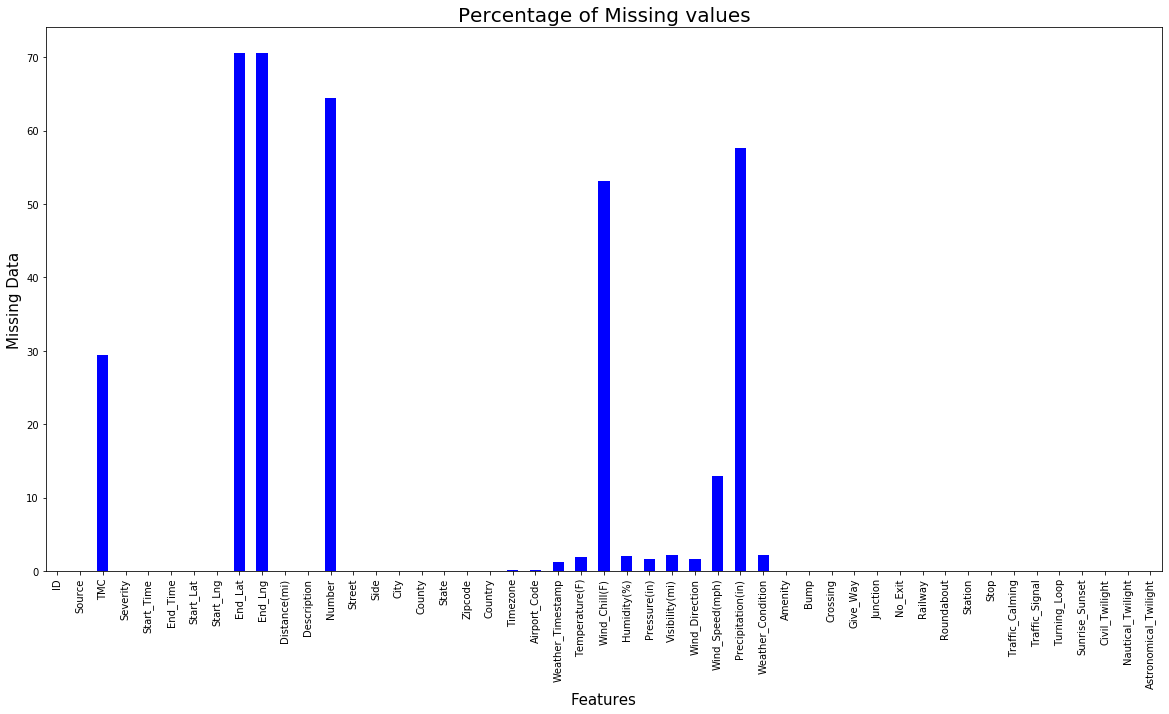

In [9]:
# calculating percentage missing values for each feature using bar graph in matplotlib
percentage_missing_values = df.isnull().sum() / df.shape[0]*100
plot_missing_val = percentage_missing_values.plot(kind = 'bar', color='blue', figsize = (20, 10),)
plot_missing_val.set_xlabel('Features', fontsize=15)
plot_missing_val.set_ylabel('Missing Data', fontsize=15)
plot_missing_val.set_title('Percentage of Missing values', fontsize=20)
plt.show()

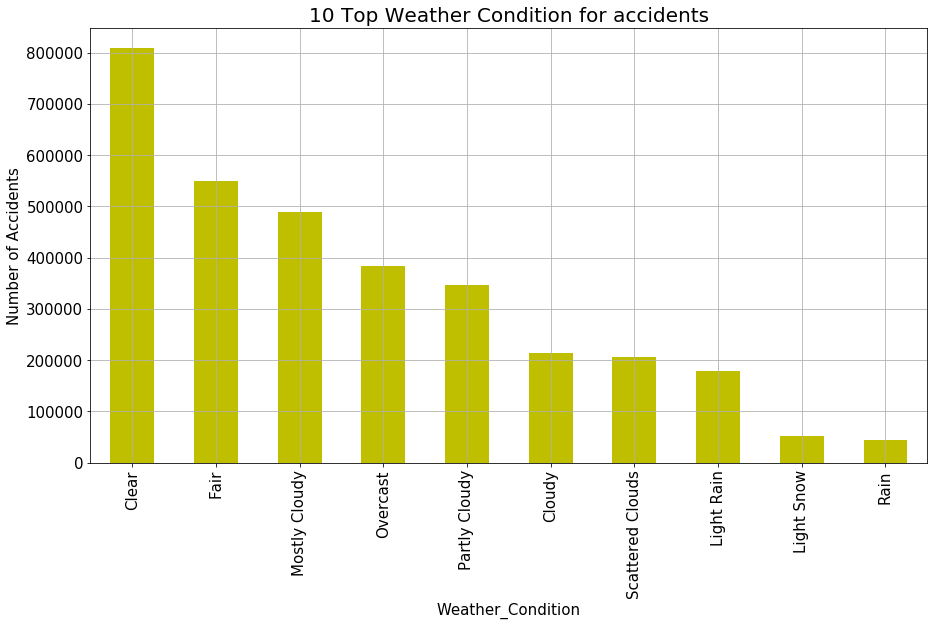

In [10]:
# Top 5 Weather Conditions under which mostly accidents happening
# Reference: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplots.html

figure,axis =plt.subplots(figsize=(15,8))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='y',align='center',linewidth=2, color = 'y')
plt.xlabel('Weather_Condition',fontsize=15)
plt.ylabel('Number of Accidents',fontsize=15)
axis.tick_params(labelsize=15)
plt.title('10 Top Weather Condition for accidents',fontsize=20)
plt.grid()

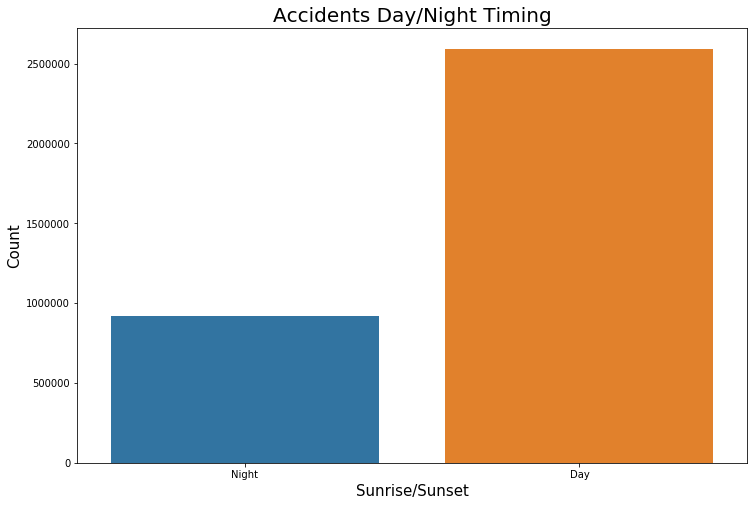

In [11]:
# Most Accidents Timing- Day/Night

plt.figure(figsize=(12,8))
Sunrise_Sunset_accidents= sns.countplot(x='Sunrise_Sunset',data=df)
Sunrise_Sunset_accidents.set_xlabel('Sunrise/Sunset', fontsize=15)
Sunrise_Sunset_accidents.set_ylabel('Count', fontsize=15)
Sunrise_Sunset_accidents.set_title('Accidents Day/Night Timing', fontsize=20)
plt.show()

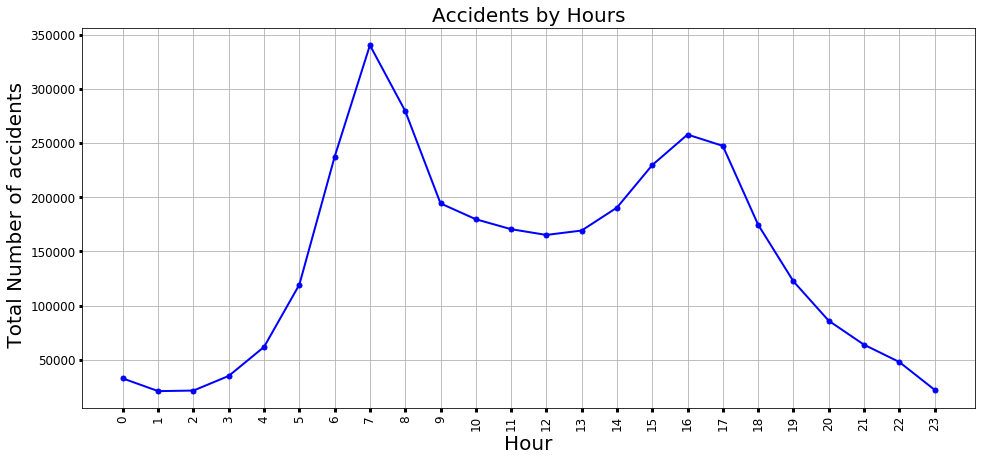

In [12]:
# Most Accidents happening Hours through out the day
#Reference: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day.html

figure,axis = plt.subplots(figsize=(16,7))
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors='coerce')
df['Start_Hour'] = df['Weather_Timestamp'].dt.hour
plt.plot(df.groupby(['Start_Hour'])['Severity'].count(), linewidth=2, marker='o', markersize=5, markeredgecolor = 'b', color ='b')
plt.xlabel('Hour',fontsize=20)
plt.ylabel(' Total Number of accidents',fontsize=20)
plt.title('Accidents by Hours',fontsize=20)
plt.xticks(np.arange(0,24),rotation=90)
axis.tick_params(labelsize=12, width=3)
plt.grid()
plt.show()

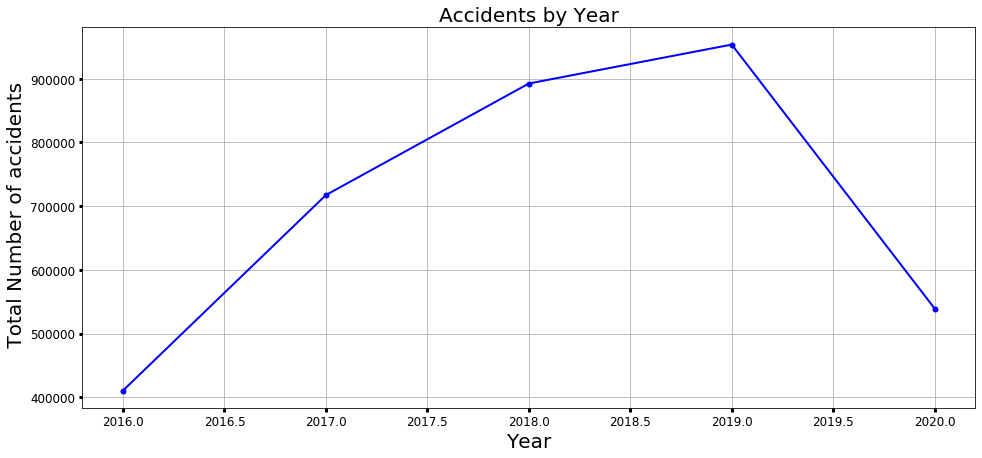

In [13]:
#DATA WRANGLING TO CONVERT TIMESTAMP OBJECT TYPE TO DATE TIME FORMAT to extract YEAR,MONTH, of Accidenty
#Reference: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

figure,axis = plt.subplots(figsize=(16,7))
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Year'] = df['Start_Time'].dt.year
plt.plot(df.groupby(['Year'])['Severity'].count(), linewidth=2, marker='o', markersize=5, markeredgecolor = 'b', color ='b')
plt.xlabel('Year',fontsize=20)
plt.ylabel(' Total Number of accidents',fontsize=20)
plt.title('Accidents by Year',fontsize=20)
axis.tick_params(labelsize=12, width=3)
plt.grid()
plt.show()

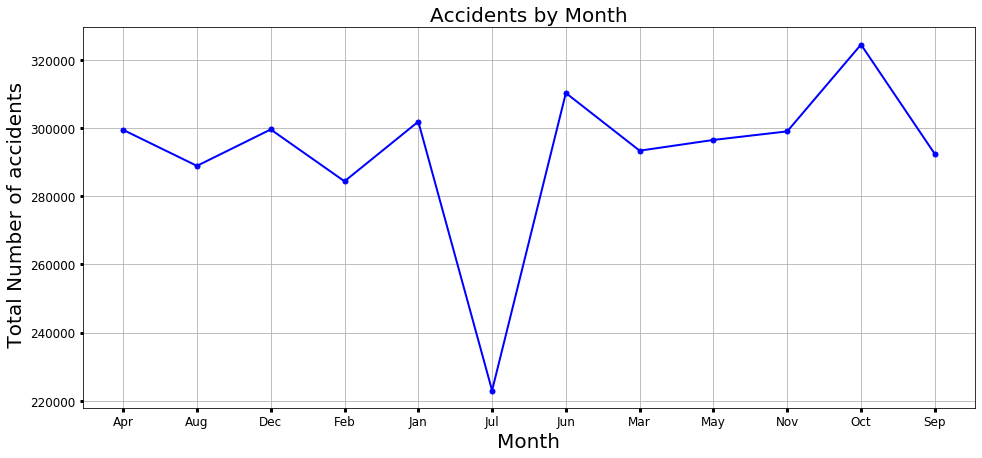

In [14]:
#Month in which at which max accidents happening
figure,axis = plt.subplots(figsize=(16,7) )
df['Month'] = df['Start_Time'].dt.strftime('%b') 
plt.plot(df.groupby(['Month'])['ID'].count(), linewidth=2, marker='o', markersize=5, markeredgecolor = 'b', 
         color ='b')
plt.xlabel('Month',fontsize=20)
plt.ylabel(' Total Number of accidents',fontsize=20)
plt.title('Accidents by Month',fontsize=20)
axis.tick_params(labelsize=12, width=3)
plt.grid()
plt.show()

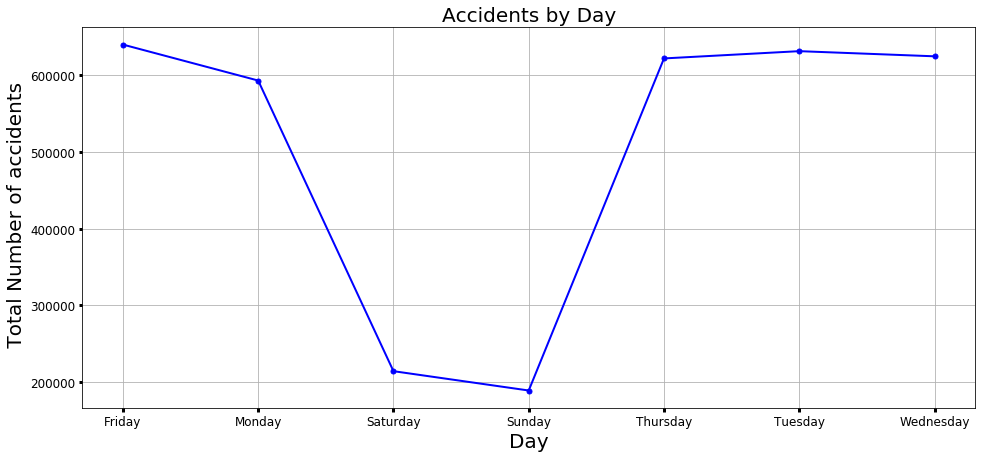

In [15]:
#Day Name at which max accidents happening
figure,axis = plt.subplots(figsize=(16,7))
df['Day'] = df['Start_Time'].dt.day_name()
plt.plot(df.groupby(['Day'])['Severity'].count(), linewidth=2, marker='o', markersize=5, markeredgecolor = 'b', color ='b')
plt.xlabel('Day',fontsize=20)
plt.ylabel(' Total Number of accidents',fontsize=20)
plt.title('Accidents by Day',fontsize=20)
axis.tick_params(labelsize=12, width=3)
plt.grid()
plt.show()

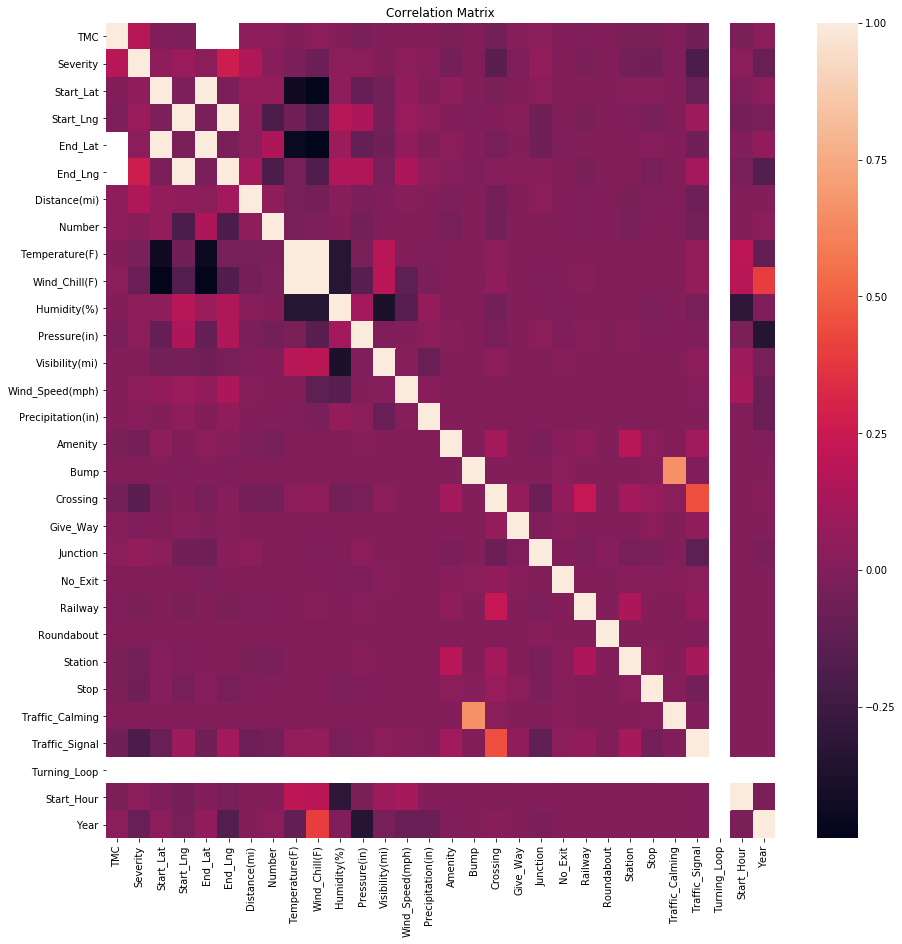

In [16]:
#Correlation matrix to if there are some independent viariable who are highly collinear (to avoid multicollinearity)
plt.figure(figsize=(15,15))
correlation_matrix = df.corr()
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix)

# Data Preprocessing

In [17]:
# Dropping few columns right away as they have no use. Some of the columns are serving same purpose so using just 
#one out them.
# Dropping columns with more than 50 % MISSING VALUES like "End_Lat", "End_Lng", "Number"
# There are columns like country,description, city, county etc as they Text Attributes 
#and will not use them in our analysis.We will drop all the columns with contributing to natural language processing.


drop_irrelavent_cols = df.loc[:,['Source','Start_Time', 'End_Time','Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
                                 'Timezone','Country', 'Airport_Code','Weather_Timestamp','Civil_Twilight', 
                                 'Nautical_Twilight','Astronomical_Twilight',"End_Lat", "End_Lng", "Number"]]

df_clean = df.drop(drop_irrelavent_cols,axis =1)
df_clean.shape
df_clean.head()

,ID,TMC,Severity,Start_Lat,Start_Lng,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Hour,Year,Month,Day
0,A-1,201.0,3,39.865147,-84.058723,OH,45424,36.9,NaN,91.0,...,False,False,False,False,False,Night,5.0,2016,Feb,Monday
1,A-2,201.0,2,39.928059,-82.831184,OH,43068-3402,37.9,NaN,100.0,...,False,False,False,False,False,Night,5.0,2016,Feb,Monday
2,A-3,201.0,2,39.063148,-84.032608,OH,45176,36.0,33.3,100.0,...,False,False,False,True,False,Night,6.0,2016,Feb,Monday
3,A-4,201.0,3,39.747753,-84.205582,OH,45417,35.1,31.0,96.0,...,False,False,False,False,False,Night,7.0,2016,Feb,Monday
4,A-5,201.0,2,39.627781,-84.188354,OH,45459,36.0,33.3,89.0,...,False,False,False,True,False,Day,7.0,2016,Feb,Monday


In [18]:
#Renaming some columns for our ease
df_clean=df_clean.rename(columns = {'Temperature(F)':'Temperature','Wind_Chill(F)':'Wind_Chill','Humidity(%)':'Humidity',
                        'Pressure(in)':'Pressure','Visibility(mi)':'Visibility','Wind_Speed(mph)':'Wind_Speed',
                        'Precipitation(in)':'Precipitation'})

In [19]:
# Setting 'ID'column as the index column 
df_clean = df_clean.set_index('ID') 
df_clean.head()

,TMC,Severity,Start_Lat,Start_Lng,State,Zipcode,Temperature,Wind_Chill,Humidity,Pressure,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Hour,Year,Month,Day
ID,,,,,,,,,,,,,,,,,,,,,
A-1,201.0,3,39.865147,-84.058723,OH,45424,36.9,NaN,91.0,29.68,...,False,False,False,False,False,Night,5.0,2016,Feb,Monday
A-2,201.0,2,39.928059,-82.831184,OH,43068-3402,37.9,NaN,100.0,29.65,...,False,False,False,False,False,Night,5.0,2016,Feb,Monday
A-3,201.0,2,39.063148,-84.032608,OH,45176,36.0,33.3,100.0,29.67,...,False,False,False,True,False,Night,6.0,2016,Feb,Monday
A-4,201.0,3,39.747753,-84.205582,OH,45417,35.1,31.0,96.0,29.64,...,False,False,False,False,False,Night,7.0,2016,Feb,Monday
A-5,201.0,2,39.627781,-84.188354,OH,45459,36.0,33.3,89.0,29.65,...,False,False,False,True,False,Day,7.0,2016,Feb,Monday


In [20]:
#Checking NAN
print('Checking selected features again after dropping columns', '\n')
print(pd.concat([df_clean.isnull().sum(), df_clean.dtypes], axis =1 ))

Checking selected features again after dropping columns 

                         0        1
TMC                1034799  float64
Severity                 0    int64
Start_Lat                0  float64
Start_Lng                0  float64
State                    0   object
Zipcode               1069   object
Temperature          65732  float64
Wind_Chill         1868249  float64
Humidity             69687  float64
Pressure             55882  float64
Visibility           75856  float64
Wind_Direction       58874   object
Wind_Speed          454609  float64
Precipitation      2025874  float64
Weather_Condition    76138   object
Amenity                  0     bool
Bump                     0     bool
Crossing                 0     bool
Give_Way                 0     bool
Junction                 0     bool
No_Exit                  0     bool
Railway                  0     bool
Roundabout               0     bool
Station                  0     bool
Stop                     0     bool
Traffi

# Data Imputation

In [21]:
#MEAN IMPUTATION FOR Continous Features
df_clean['Temperature'] = df_clean['Temperature'].fillna(df_clean['Temperature'].mean())
df_clean['Humidity'] = df_clean['Humidity'].fillna(df_clean['Humidity'].mean())
df_clean['Wind_Chill'] = df_clean['Wind_Chill'].fillna(df_clean['Wind_Chill'].mean())
df_clean['Pressure'] = df_clean['Pressure'].fillna(df_clean['Pressure'].mean())
df_clean['Wind_Speed'] = df_clean['Wind_Speed'].fillna(df_clean['Wind_Speed'].mean())
df_clean['Precipitation'] = df_clean['Precipitation'].fillna(df_clean['Precipitation'].mean())

In [22]:
#Mode Imputation for Categorical Features
df_clean['Weather_Condition'] = df_clean['Weather_Condition'].fillna(df_clean['Weather_Condition'].mode().iloc[0])
df_clean['Visibility'] = df_clean['Visibility'].fillna(df_clean['Visibility'].mode().iloc[0])
df_clean['Wind_Direction'] = df_clean['Wind_Direction'].fillna(df_clean['Wind_Direction'].mode().iloc[0])
df_clean['Sunrise_Sunset'] = df_clean['Sunrise_Sunset'].fillna(df_clean['Sunrise_Sunset'].mode().iloc[0])

In [23]:
print("Checking selected features again after DATA IMPUTATION columns ", '\n')
print(pd.concat([df_clean.isnull().sum(), df_clean.dtypes], axis =1 ))

Checking selected features again after DATA IMPUTATION columns  

                         0        1
TMC                1034799  float64
Severity                 0    int64
Start_Lat                0  float64
Start_Lng                0  float64
State                    0   object
Zipcode               1069   object
Temperature              0  float64
Wind_Chill               0  float64
Humidity                 0  float64
Pressure                 0  float64
Visibility               0  float64
Wind_Direction           0   object
Wind_Speed               0  float64
Precipitation            0  float64
Weather_Condition        0   object
Amenity                  0     bool
Bump                     0     bool
Crossing                 0     bool
Give_Way                 0     bool
Junction                 0     bool
No_Exit                  0     bool
Railway                  0     bool
Roundabout               0     bool
Station                  0     bool
Stop                     0     boo

In [24]:
#DELETE extra columns 'Hour', 'Year', 'Month', 'Day'
# df_clean.drop(['Start_Hour', 'Year', 'Month'], axis = 1, inplace = True)
df_clean = df_clean.drop([ 'TMC','Year','Zipcode'], axis = 1)

In [25]:
df_clean.shape

(3513617, 30)

In [26]:
# ================= Dropping all the missing values ==============
df_clean = df_clean.dropna()
df_clean.shape


(3470294, 30)

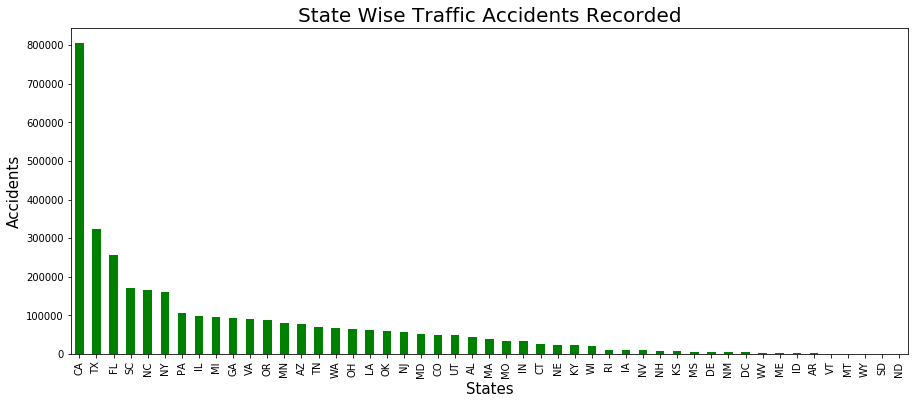

In [27]:
#State wise highest number of accidents to narrow down the scope of project
plt.figure(figsize=(15,6))
state_accmax = df_clean.State.value_counts().plot(kind='bar',color='green')
state_accmax.set_xlabel('States', fontsize=15)
state_accmax.set_ylabel('Accidents', fontsize=15)
state_accmax.set_title('State Wise Traffic Accidents Recorded', fontsize=20)
plt.show()

In [28]:
# df_CA = df_clean[df_clean['State']=='CA']
# df_CA.head()

In [29]:
# df_CA.shape

## Hot Encode Categorical Variables

In [30]:
#Point-Of-Interest (POI) annotation
df_clean['Amenity'] = pd.get_dummies(df_clean['Amenity'])
df_clean['Bump'] = pd.get_dummies(df_clean['Bump'])
df_clean['Crossing'] = pd.get_dummies(df_clean['Crossing'])
df_clean['Give_Way'] = pd.get_dummies(df_clean['Give_Way'])
df_clean['Junction'] = pd.get_dummies(df_clean['Junction'])
df_clean['No_Exit'] = pd.get_dummies(df_clean['No_Exit'])
df_clean['Railway'] = pd.get_dummies(df_clean['Railway'])
df_clean['Roundabout'] = pd.get_dummies(df_clean['Roundabout'])
df_clean['Station'] = pd.get_dummies(df_clean['Station'])
df_clean['Stop'] = pd.get_dummies(df_clean['Stop'])
df_clean['Traffic_Calming'] = pd.get_dummies(df_clean['Traffic_Calming'])
df_clean['Traffic_Signal'] = pd.get_dummies(df_clean['Traffic_Signal'])
df_clean['Turning_Loop'] = pd.get_dummies(df_clean['Turning_Loop'])


In [31]:
df_clean

,Severity,Start_Lat,Start_Lng,State,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Hour,Month,Day
ID,,,,,,,,,,,,,,,,,,,,,
A-1,3,39.865147,-84.058723,OH,36.9,53.557295,91.0,29.68,10.0,Calm,...,1,1,1,1,1,1,Night,5.0,Feb,Monday
A-2,2,39.928059,-82.831184,OH,37.9,53.557295,100.0,29.65,10.0,Calm,...,1,1,1,1,1,1,Night,5.0,Feb,Monday
A-3,2,39.063148,-84.032608,OH,36.0,33.300000,100.0,29.67,10.0,SW,...,1,1,1,1,0,1,Night,6.0,Feb,Monday
A-4,3,39.747753,-84.205582,OH,35.1,31.000000,96.0,29.64,9.0,SW,...,1,1,1,1,1,1,Night,7.0,Feb,Monday
A-5,2,39.627781,-84.188354,OH,36.0,33.300000,89.0,29.65,6.0,SW,...,1,1,1,1,0,1,Day,7.0,Feb,Monday
A-6,3,40.100590,-82.925194,OH,37.9,35.500000,97.0,29.63,7.0,SSW,...,1,1,1,1,1,1,Day,7.0,Feb,Monday
A-7,2,39.758274,-84.230507,OH,34.0,31.000000,100.0,29.66,7.0,WSW,...,1,1,1,1,1,1,Day,7.0,Feb,Monday
A-8,3,39.770382,-84.194901,OH,34.0,31.000000,100.0,29.66,7.0,WSW,...,1,1,1,1,1,1,Day,7.0,Feb,Monday
A-9,2,39.778061,-84.172005,OH,33.3,53.557295,99.0,29.67,5.0,SW,...,1,1,1,1,1,1,Day,7.0,Feb,Monday


In [32]:
#Weather Attributes
df_clean['Sunrise_Sunset'] = pd.get_dummies(df_clean['Sunrise_Sunset'])
df_clean['Weather_Condition'] = pd.get_dummies(df_clean['Weather_Condition'])
df_clean['Wind_Direction'] = pd.get_dummies(df_clean['Wind_Direction'])
df_clean['Weather_Condition'] = pd.get_dummies(df_clean['Weather_Condition'])
df_clean['Day'] = pd.get_dummies(df_clean['Day'])
df_clean['Start_Hour'] = pd.get_dummies(df_clean['Start_Hour'])
df_clean['Month'] = pd.get_dummies(df_clean['Month'])

In [33]:
df_clean.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'State', 'Temperature',
       'Wind_Chill', 'Humidity', 'Pressure', 'Visibility', 'Wind_Direction',
       'Wind_Speed', 'Precipitation', 'Weather_Condition', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Start_Hour', 'Month', 'Day'],
      dtype='object')

In [34]:
df_clean = df_clean.drop(['State'], axis = 1)
# df_CA = df_CA.drop(['Zipcode'], axis = 1)
# df_CA.dtypes

In [35]:
df_clean.shape

(3470294, 29)

In [36]:
# To check Multicollinearity
#Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

corr = df_clean.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_clean.columns[columns]
data = df_clean[selected_columns]


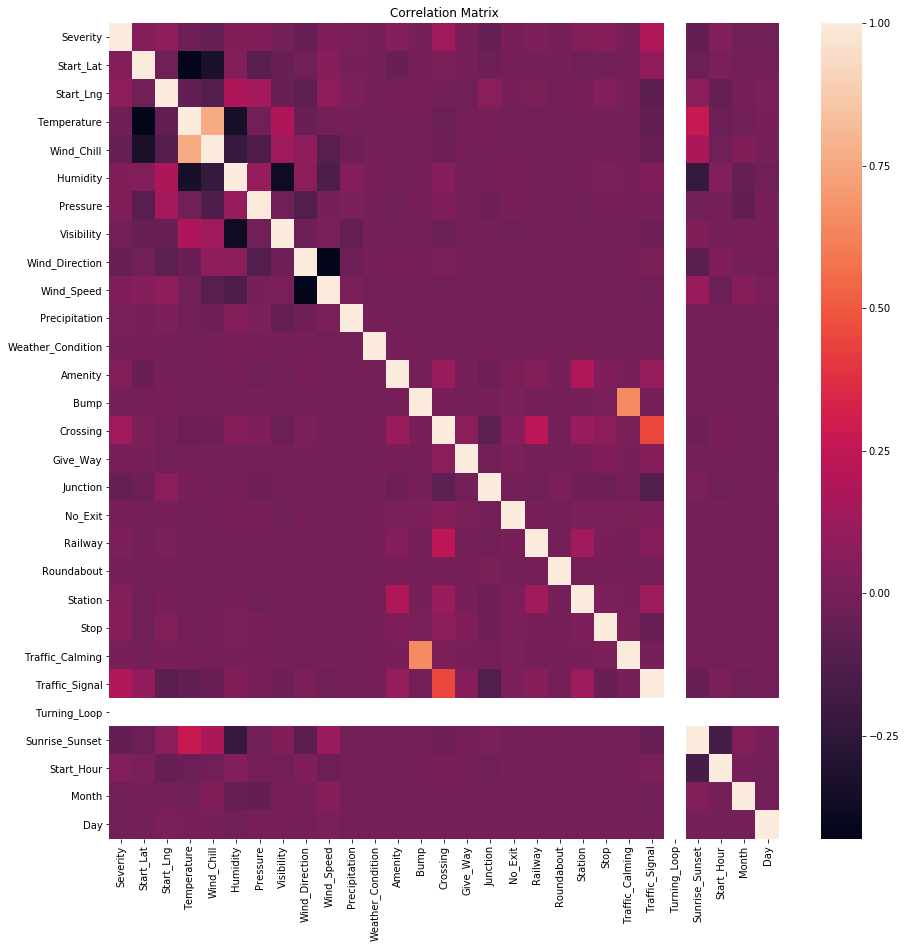

In [37]:
#Correlation matrix to if there are some independent viariable who are highly collinear (to avoid multicollinearity)
plt.figure(figsize=(15,15))
corr_matrix = data.corr()
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix)

In [38]:
X = df_clean.drop(columns=['Severity'], axis =1)
target= 'Severity'
y = df_clean['Severity']

In [39]:
y.value_counts()

2    2344534
3     986349
4     110477
1      28934
Name: Severity, dtype: int64

# Sampling-RandomOverSampler

In [40]:
# from imblearn.over_sampling import RandomOverSampler

# # RandomOverSampler (with random_state=0)
# # Implement me
# ros = RandomOverSampler(random_state=0)
# X, y = ros.fit_sample(X, y)

# pd.DataFrame(data=y, columns=[target])[target].value_counts()

# Sampling(Over & Under only Code)

In [41]:
counter = Counter(y)
print(counter)

Counter({2: 2344534, 3: 986349, 4: 110477, 1: 28934})


In [42]:
under = RandomUnderSampler(sampling_strategy={2:1200000,3:600000})
over = SMOTE(sampling_strategy={4:150000,1:50000})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [43]:
X, y = pipeline.fit_resample(X, y)

In [44]:
counter = Counter(y)
print(counter)

Counter({2: 1200000, 3: 600000, 4: 150000, 1: 50000})


# Data Reduction

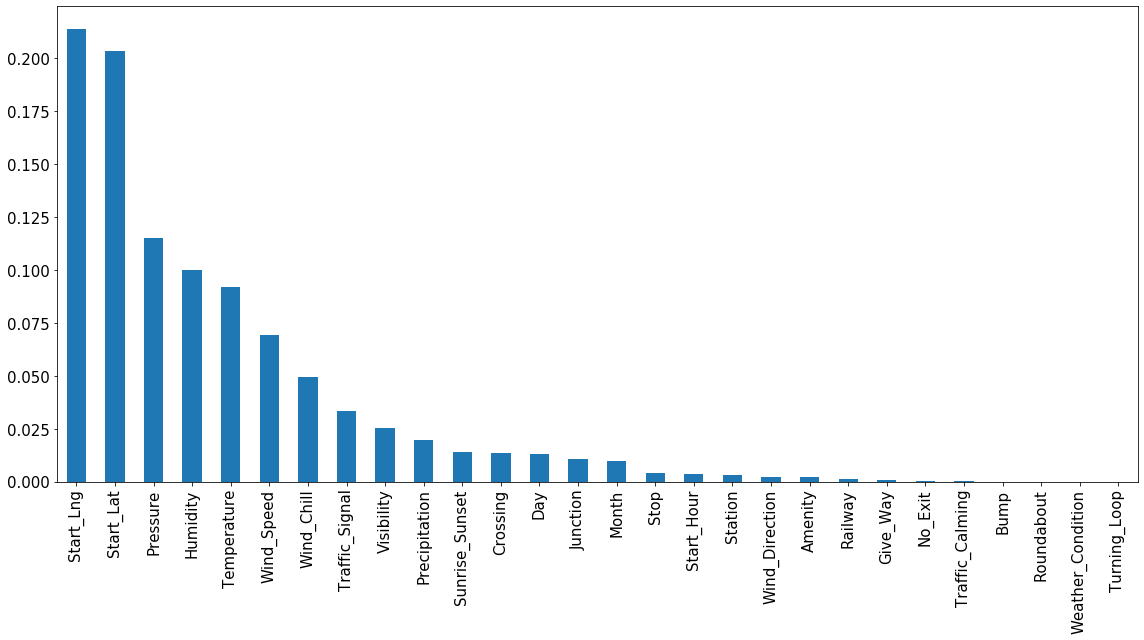

In [45]:
#Splitting the data into independent and dependent variables
# X = df_CA.drop(columns=['Severity'], axis =1)
# y = df_CA['Severity']


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# perform training
clf.fit(X_train, y_train)

# plot feature importances
# get feature importances
importances = clf.feature_importances_

# convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# f_importances = pd.Series(importances, df_CA.drop(columns = 'Severity').columns)
f_importances = pd.Series(importances, df_clean.drop(columns = 'Severity').columns)

    
# sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# make the bar Plot from f_importances
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16, 9), rot=90, fontsize=15)

# show the plot
plt.tight_layout()
plt.show()


In [46]:
print ('='*80 + '\n')
print("Top 20 important features and their importance values")
print ('='*80 + '\n')
print(f_importances.index[0:20], f_importances.values[0:20])
print ('='*80 + '\n')



Top 20 important features and their importance values

Index(['Start_Lng', 'Start_Lat', 'Pressure', 'Humidity', 'Temperature',
       'Wind_Speed', 'Wind_Chill', 'Traffic_Signal', 'Visibility',
       'Precipitation', 'Sunrise_Sunset', 'Crossing', 'Day', 'Junction',
       'Month', 'Stop', 'Start_Hour', 'Station', 'Wind_Direction', 'Amenity'],
      dtype='object') [0.21388609 0.20363881 0.11493151 0.100064   0.09214052 0.06927105
 0.04956272 0.03319609 0.02513251 0.01953085 0.01417564 0.01341798
 0.01284108 0.01093324 0.0097668  0.00394094 0.00350656 0.00298041
 0.00238279 0.00200841]



In [47]:
# # Important Features
dff = df_clean.loc[:, ['Severity', 'Start_Lng', 'Start_Lat', 'Pressure', 'Humidity', 'Temperature',
       'Wind_Speed', 'Wind_Chill', 'Traffic_Signal', 'Visibility',
       'Precipitation', 'Sunrise_Sunset', 'Crossing', 'Day', 'Month',
       'Junction', 'Stop', 'Start_Hour', 'Station', 'Wind_Direction',
       'Amenity']]
        
dff.head()

,Severity,Start_Lng,Start_Lat,Pressure,Humidity,Temperature,Wind_Speed,Wind_Chill,Traffic_Signal,Visibility,...,Sunrise_Sunset,Crossing,Day,Month,Junction,Stop,Start_Hour,Station,Wind_Direction,Amenity
ID,,,,,,,,,,,,,,,,,,,,,
A-1,3,-84.058723,39.865147,29.68,91.0,36.9,8.219025,53.557295,1,10.0,...,0,1,0,0,1,1,0,1,0,1
A-2,2,-82.831184,39.928059,29.65,100.0,37.9,8.219025,53.557295,1,10.0,...,0,1,0,0,1,1,0,1,0,1
A-3,2,-84.032608,39.063148,29.67,100.0,36.0,3.500000,33.300000,0,10.0,...,0,1,0,0,1,1,0,1,0,1
A-4,3,-84.205582,39.747753,29.64,96.0,35.1,4.600000,31.000000,1,9.0,...,0,1,0,0,1,1,0,1,0,1
A-5,2,-84.188354,39.627781,29.65,89.0,36.0,3.500000,33.300000,0,6.0,...,1,1,0,0,1,1,0,1,0,1


In [48]:
# #Correlation matrix to if there are some independent viariable who are highly collinear (to avoid multicollinearity)
# plt.figure(figsize=(15,15))
# corr_matrix = dff.corr()
# plt.title('Correlation Matrix')
# sns.heatmap(corr_matrix)

# Train Test Split

In [49]:
X = dff.drop(columns=['Severity'], axis =1)
Y = dff['Severity']

In [50]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Standard Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalar_train.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.829275,-1.859740,0.391827,1.274029,0.520378,-0.024113,-0.000574,0.465127,0.302088,-0.000324,0.594911,0.291531,2.122959,-0.306126,0.297011,0.1223,-0.097474,0.142713,-0.258445,0.110092
1,-1.525899,2.198065,-0.030107,0.656564,-0.913224,0.157777,-0.829232,0.465127,0.302088,-0.125228,0.594911,0.291531,-0.471041,-0.306126,0.297011,0.1223,-0.097474,0.142713,-0.258445,0.110092
2,-0.952983,-0.623418,0.476214,0.039099,-0.740760,-0.000058,-0.000574,-2.149951,0.302088,-0.000324,0.594911,-3.430171,-0.471041,-0.306126,0.297011,0.1223,-0.097474,0.142713,-0.258445,0.110092
3,-1.398652,0.584110,-0.271213,1.538657,-1.807878,-0.000058,-0.000574,0.465127,-2.656400,-0.000324,0.594911,0.291531,-0.471041,-0.306126,0.297011,0.1223,-0.097474,0.142713,-0.258445,0.110092
4,0.020980,-1.363714,0.210998,-1.151727,0.919200,-0.953769,-0.000574,-2.149951,0.302088,-0.000324,0.594911,-3.430171,-0.471041,-0.306126,0.297011,0.1223,-0.097474,0.142713,-0.258445,0.110092


In [52]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

# Model -MLP

In [53]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(solver='adam', alpha=0.0001,
                    hidden_layer_sizes=(20, 20, 20), random_state=1,max_iter=200,learning_rate_init=0.001)

In [54]:
clf_MLP.fit(scalar_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [55]:
y_pred=clf_MLP.predict(scalar_test)

In [56]:
clf_MLP.score(scalar_test,y_test)

0.7030878243838903

# Model - Logistic Regression

In [57]:
# creating the classifier object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# performing training
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# predicton on test
y_pred = lr.predict(X_test)

y_pred_score = lr.predict_proba(X_test)

In [59]:
# calculate metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("\n")

print("Classification Report: ")
print(classification_report(y_test,y_pred))
print("\n")


print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("\n")




Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      8676
           2       0.68      1.00      0.81    703540
           3       0.43      0.01      0.01    295829
           4       0.00      0.00      0.00     33044

    accuracy                           0.68   1041089
   macro avg       0.28      0.25      0.21   1041089
weighted avg       0.58      0.68      0.55   1041089



Accuracy :  67.57068800073769




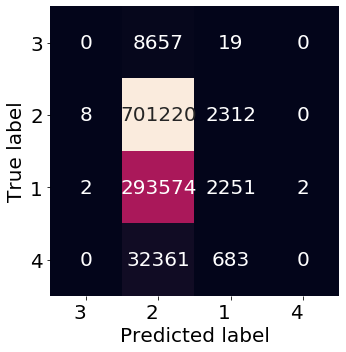

In [60]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = dff['Severity'].unique()

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()

# MODEL- XGBOOST 

In [61]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
# make predictions for test data
y_pred = model_XGB.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 68.32%


In [62]:
print("XG-Boost Score for ","Accuracy: %.2f%%" % (accuracy * 100.0))

XG-Boost Score for  Accuracy: 68.32%


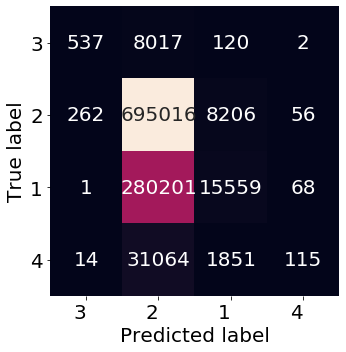

In [65]:
conf_matrix_xgboost = confusion_matrix(y_test, y_pred)
class_names = dff['Severity'].unique()

df_cm_xgboost = pd.DataFrame(conf_matrix_xgboost, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))
hm_xgboost = sns.heatmap(df_cm_xgboost, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm_xgboost.columns, xticklabels=df_cm_xgboost.columns)
hm_xgboost.yaxis.set_ticklabels(hm_xgboost.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm_xgboost.xaxis.set_ticklabels(hm_xgboost.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()